In [175]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
import gensim
import csv
import json
import nltk
from gensim import corpora, models
import numpy as np
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle 
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import itertools
from matplotlib import pyplot
from gensim.models.ldamulticore import LdaMulticore
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
import math
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36"}

In [3]:
moviedf = pd.DataFrame(columns = ['movie', 'summary'])

In [12]:
moviedf

,movie,summary
0,Extraction,"Tyler Rake, a fearless black market mercenary,..."
1,Star Wars: Episode IX - The Rise of Skywalker,The surviving members of the resistance face t...
2,Dangerous Lies,When a wealthy elderly man dies and unexpected...
3,The Half of It,When smart but cash-strapped teen Ellie Chu ag...
4,365 dni,Massimo is a member of the Sicilian Mafia fami...
5,Once Upon a Time... in Hollywood,A faded television actor and his stunt double ...
6,The Gentlemen,An American expat tries to sell off his highly...
7,Gisaengchung,Greed and class discrimination threaten the ne...
8,Bad Education,The beloved superintendent of New York's Rosly...
9,The Lodge,A soon-to-be stepmom is snowed in with her fia...


In [4]:
count = 0

In [11]:
source = requests.get('https://www.imdb.com/search/title/?title_type=movie&start='+str(count+1)+'&explore=title_type,genres&ref_=adv_nxt', headers = headers).text
soup = BeautifulSoup(source, 'html.parser')

pages = 2 #set amount of pages to browse for movies
current_page = soup
for page in range(pages):
    blocks = current_page.find('div', class_ = 'article').find('div', class_ = 'lister-list').find_all('div', class_ = 'lister-item mode-advanced')
    for block in blocks:
        count += 1
        print('pages', page+1, 'count', count)
        movie = block.find('h3', class_ = 'lister-item-header').a.text
        movie_code = block.find('div', class_ = 'ribbonize').attrs['data-tconst']
           
        summary_page = 'https://www.imdb.com/title/' + movie_code + '/plotsummary'
        source = requests.get(summary_page, headers=headers).text
        soup = BeautifulSoup(source, 'html.parser')
        is_summary_not_exist = soup.find('li', class_ = 'ipl-zebra-list__item', id = 'no-summary-content')
        if is_summary_not_exist is not None: # triple negative here -> check if not exist then skip
            continue
        summary_blocks = soup.find('ul', class_ = 'ipl-zebra-list', id = 'plot-summaries-content').find_all('li', class_ = 'ipl-zebra-list__item')
        summary = ''
        for summary_block in summary_blocks:
            summary += summary_block.p.text
        moviedf.loc[len(moviedf)] = [movie, summary]
    
    next_page_button = current_page.find('a', class_ = 'lister-page-next next-page').attrs['href']
    next_page_url = 'https://www.imdb.com' + next_page_button
    source = requests.get(next_page_url, headers = headers).text
    soup = BeautifulSoup(source, 'html.parser')
    current_page = soup
    

pages 1 count 3001
pages 1 count 3002
pages 1 count 3003
pages 1 count 3004
pages 1 count 3005
pages 1 count 3006
pages 1 count 3007
pages 1 count 3008
pages 1 count 3009
pages 1 count 3010
pages 1 count 3011
pages 1 count 3012
pages 1 count 3013
pages 1 count 3014
pages 1 count 3015
pages 1 count 3016
pages 1 count 3017
pages 1 count 3018
pages 1 count 3019
pages 1 count 3020
pages 1 count 3021
pages 1 count 3022
pages 1 count 3023
pages 1 count 3024
pages 1 count 3025
pages 1 count 3026
pages 1 count 3027
pages 1 count 3028
pages 1 count 3029
pages 1 count 3030
pages 1 count 3031
pages 1 count 3032
pages 1 count 3033
pages 1 count 3034
pages 1 count 3035
pages 1 count 3036
pages 1 count 3037
pages 1 count 3038
pages 1 count 3039
pages 1 count 3040
pages 1 count 3041
pages 1 count 3042
pages 1 count 3043
pages 1 count 3044
pages 1 count 3045
pages 1 count 3046
pages 1 count 3047
pages 1 count 3048
pages 1 count 3049
pages 1 count 3050
pages 2 count 3051
pages 2 count 3052
pages 2 coun

In [13]:
moviedf.to_csv('summary2.csv', index = False)

In [14]:
moviedf = pd.read_csv('summary2.csv')
summary_text = moviedf['summary']
moviedf.head()

,movie,summary
0,Extraction,"Tyler Rake, a fearless black market mercenary,..."
1,Star Wars: Episode IX - The Rise of Skywalker,The surviving members of the resistance face t...
2,Dangerous Lies,When a wealthy elderly man dies and unexpected...
3,The Half of It,When smart but cash-strapped teen Ellie Chu ag...
4,365 dni,Massimo is a member of the Sicilian Mafia fami...


In [15]:
summary_text = summary_text.apply(lambda x: x.strip())
summary_text = summary_text.apply(lambda x: x.lower())
summary_text = summary_text.apply(lambda x: x.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))))
summary_text = summary_text.apply(lambda x: word_tokenize(x))
summary_text = summary_text.apply(lambda x: [i for i in x if len(i) >= 3])
summary_text = summary_text.apply(lambda x: [i for i in x if i not in stopwords.words("english")])
lemmatizer = WordNetLemmatizer()
summary_text = summary_text.apply(lambda x: [lemmatizer.lemmatize(i, pos="v") for i in x])

In [18]:
file_summary_text = open('summary_text.xml', 'wb') 
pickle.dump(summary_text, file_summary_text)

In [19]:
filehandler = open('summary_text.xml', 'rb') 
summary_text = pickle.load(filehandler)

In [37]:
summary_dictionary = gensim.corpora.Dictionary(summary_text)
print('Total documents:', summary_dictionary.num_docs)
print('Total words:', summary_dictionary.num_pos)
print('Distinct words:', len(summary_dictionary))

Total documents: 3100
Total words: 615115
Distinct words: 30077


In [38]:
summary_dictionary.filter_extremes(no_below = 50, no_above=0.5)
print('Total documents:', summary_dictionary.num_docs)
print('Total words:', summary_dictionary.num_pos)
print('Distinct words:', len(summary_dictionary))

Total documents: 3100
Total words: 615115
Distinct words: 1524


In [39]:
summary_bow_corpus = [summary_dictionary.doc2bow(doc) for doc in summary_text]

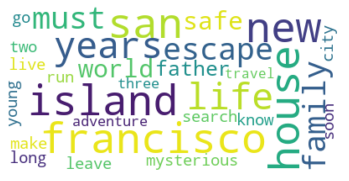

In [230]:
text = summary_lda_model.print_topic(91, topn = 30)



wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [294]:
moviedf['summary'][moviedf['movie'].tolist().index('Cinderella')]

'When her father unexpectedly dies, young Ella finds herself at the mercy of her cruel stepmother and her scheming stepsisters. Never one to give up hope, Ella\'s fortunes begin to change after meeting a dashing stranger.A girl named Ella (Cinderella) has the purest heart living in a cruel world filled with evil stepsisters and an evil stepmother out to ruin Ella\'s life. Ella becomes one with her pure heart when she meets the Prince and dances her way to a better life with glass shoes, and a little help from her fairy godmother, of course.A live-action retelling of the classic fairytale about a servant stepdaughter who is abused by her jealous stepmother and stepsisters after her father died. Forced to be a servant in her own house, through it all she did not let anything or anyone crush her spirit. Then one day, she meets a dashing stranger in the woods.Ella (Eloise Webb) lives with her wealthy parents in a beautiful estate in a peaceful kingdom. From a young age, she is taught by he

In [208]:
ldadf.iloc[110]

0     0.000048
1     0.000048
2     0.000048
3     0.000048
4     0.000048
5     0.000048
6     0.000048
7     0.000048
8     0.000048
9     0.000048
10    0.000048
11    0.000048
12    0.000048
13    0.000048
14    0.000048
15    0.000048
16    0.000048
17    0.000048
18    0.000048
19    0.000048
20    0.000048
21    0.000048
22    0.000048
23    0.000048
24    0.000048
25    0.000048
26    0.159624
27    0.000048
28    0.000048
29    0.000048
        ...   
70    0.000048
71    0.000048
72    0.000048
73    0.000048
74    0.000048
75    0.000048
76    0.000048
77    0.000048
78    0.000048
79    0.000048
80    0.000048
81    0.000048
82    0.000048
83    0.000048
84    0.000048
85    0.000048
86    0.000048
87    0.000048
88    0.000048
89    0.000048
90    0.000048
91    0.000048
92    0.000048
93    0.446327
94    0.000048
95    0.000048
96    0.000048
97    0.000048
98    0.000048
99    0.000048
Name: 110, Length: 100, dtype: float64

In [224]:
summary_lda_model = gensim.models.LdaMulticore(summary_bow_corpus, 
                                   num_topics = 100,
                                   id2word = summary_dictionary,                                    
                                   passes = 10,
                                   workers = 4,
                                   alpha = 0.005,
                                   eta = 0.1
                                   
                                   )
for idx, topic in summary_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.020*"guard" + 0.017*"prison" + 0.016*"black" + 0.015*"team" + 0.011*"date" + 0.011*"go" + 0.010*"strike" + 0.010*"coach" + 0.010*"former" + 0.009*"criminal"
Topic: 1 
Words: 0.038*"king" + 0.018*"prince" + 0.014*"princess" + 0.012*"queen" + 0.009*"kingdom" + 0.009*"become" + 0.009*"elizabeth" + 0.009*"take" + 0.009*"jones" + 0.008*"father"
Topic: 2 
Words: 0.030*"mother" + 0.028*"sisters" + 0.022*"sister" + 0.020*"two" + 0.016*"parent" + 0.015*"year" + 0.015*"old" + 0.013*"girls" + 0.013*"young" + 0.012*"kid"
Topic: 3 
Words: 0.025*"school" + 0.017*"college" + 0.016*"get" + 0.015*"body" + 0.013*"new" + 0.012*"high" + 0.012*"student" + 0.011*"university" + 0.009*"friends" + 0.008*"help"
Topic: 4 
Words: 0.023*"team" + 0.012*"world" + 0.012*"monsters" + 0.009*"secret" + 0.009*"lead" + 0.009*"murder" + 0.009*"america" + 0.007*"discover" + 0.007*"know" + 0.007*"work"
Topic: 5 
Words: 0.035*"alien" + 0.020*"new" + 0.018*"earth" + 0.014*"years" + 0.014*"york" + 0.013*"back

In [217]:
summary_tfidf = models.TfidfModel(summary_bow_corpus)
summary_corpus_tfidf = summary_tfidf[summary_bow_corpus]

In [222]:
summary_tfidf_lda_model =  gensim.models.LdaMulticore(summary_corpus_tfidf, 
                                   num_topics = 100,
                                   id2word = summary_dictionary,                                    
                                   passes = 30,
                                   workers = 4,
                                   alpha = 0.02,
                                   eta = 0.1
                                   )
for idx, topic in summary_tfidf_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.001*"peter" + 0.001*"three" + 0.001*"fix" + 0.001*"machine" + 0.001*"commander" + 0.001*"wild" + 0.001*"wonder" + 0.001*"woman" + 0.001*"engage" + 0.001*"alien"
Topic: 1 
Words: 0.001*"william" + 0.001*"band" + 0.001*"style" + 0.001*"van" + 0.001*"writer" + 0.001*"stone" + 0.001*"write" + 0.001*"reunite" + 0.001*"alien" + 0.001*"horror"
Topic: 2 
Words: 0.006*"gangster" + 0.003*"look" + 0.002*"years" + 0.002*"new" + 0.001*"safe" + 0.001*"mob" + 0.001*"frank" + 0.001*"house" + 0.001*"receive" + 0.001*"reign"
Topic: 3 
Words: 0.001*"spy" + 0.001*"source" + 0.001*"crisis" + 0.001*"workers" + 0.001*"mike" + 0.001*"put" + 0.001*"island" + 0.001*"witch" + 0.001*"try" + 0.001*"revenge"
Topic: 4 
Words: 0.001*"chris" + 0.001*"crisis" + 0.001*"combat" + 0.001*"champion" + 0.001*"russian" + 0.001*"dad" + 0.001*"match" + 0.001*"period" + 0.001*"soldier" + 0.001*"propose"
Topic: 5 
Words: 0.004*"hunter" + 0.004*"twist" + 0.003*"teenager" + 0.003*"unexpected" + 0.003*"adventure" 

In [200]:
summary_lda_model.save('summary100_lda.model')

In [261]:
review_lda_model = LdaMulticore.load('summary100_lda.model')

In [262]:
lda_data = []
for i in range(len(moviedf)):
    top_topics = summary_lda_model.get_document_topics(summary_bow_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(100)]
    lda_data.append(topic_vec)
ldadf = pd.DataFrame(lda_data)

In [216]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(summary_lda_model, summary_bow_corpus, summary_dictionary)
LDAvis_prepared

C:\Users\asus\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
52     0.105760 -0.004218       1        1  8.273096
28    -0.039107  0.097470       2        1  4.113664
51     0.071908  0.058272       3        1  4.039675
64    -0.144696 -0.043183       4        1  3.829854
54     0.117865 -0.006110       5        1  3.370689
43     0.067318 -0.051980       6        1  3.177800
32    -0.101680 -0.012960       7        1  2.911975
48    -0.142794 -0.083329       8        1  2.838259
46     0.121631  0.026408       9        1  2.712002
27     0.138382 -0.039846      10        1  2.538957
1      0.007130 -0.060687      11        1  2.414966
74    -0.004715 -0.081395      12        1  2.062064
90    -0.020785  0.035796      13        1  1.662531
75    -0.111020  0.109175      14        1  1.571131
94    -0.174563  0.098341      15        1  1.545966
82     0.027012 -0.022104      16        1  1.425146
30    -0.005799  0.060955      17        1  1.374209
14     0.007147  0.031931      18        1  1.364457
39     0.043684  0.016713      19        1  1.253944
5     -0.096756 -0.059485      20        1  1.252242
79    -0.020002  0.021720      21        1  1.242634
55    -0.050560 -0.023530      22        1  1.180950
95     0.054039 -0.023193      23        1  1.147719
35     0.045885 -0.029240      24        1  1.144755
60    -0.074949  0.072032      25        1  1.133354
10     0.012164  0.074614      26        1  1.129144
56     0.052489 -0.013265      27        1  1.101470
23    -0.030044 -0.051326      28        1  1.084581
2      0.066505 -0.100114      29        1  1.022320
47     0.023694  0.053669      30        1  1.017365
...         ...       ...     ...      ...       ...
58     0.009156 -0.047030      71        1  0.442775
89     0.038690 -0.007285      72        1  0.439669
97     0.037793  0.004330      73        1  0.438561
33     0.039407  0.032089      74        1  0.438143
29    -0.026852 -0.039015      75        1  0.410076
24     0.037676  0.028665      76        1  0.403352
61     0.015493 -0.042740      77        1  0.394070
92    -0.045859  0.056823      78        1  0.391311
76     0.003133  0.024807      79        1  0.389345
69    -0.084459 -0.059993      80        1  0.378629
8     -0.088264 -0.003905      81        1  0.375896
42     0.088327 -0.055202      82        1  0.369927
84    -0.016624  0.068212      83        1  0.345718
17     0.014750 -0.034806      84        1  0.339279
26    -0.012253  0.012271      85        1  0.308751
66    -0.057053  0.049747      86        1  0.306790
87     0.025743 -0.008268      87        1  0.304467
78     0.044054  0.018866      88        1  0.300500
7     -0.013742 -0.057103      89        1  0.288242
9     -0.029133  0.020130      90        1  0.273608
73     0.001233 -0.007526      91        1  0.263227
96    -0.000991 -0.029368      92        1  0.241892
38    -0.004835  0.025449      93        1  0.228259
62     0.007272 -0.036443      94        1  0.180726
71    -0.061814 -0.075576      95        1  0.172766
44    -0.044498 -0.025793      96        1  0.158063
85     0.041617  0.036090      97        1  0.157791
0      0.005638  0.002101      98        1  0.153867
81     0.007903  0.017473      99        1  0.151109
80     0.004133  0.005123     100        1  0.068313

[100 rows x 5 columns], topic_info=      Category         Freq        Term        Total  loglift  logprob
603    Default   851.000000        john   851.000000  30.0000  30.0000
104    Default  1181.000000      school  1181.000000  29.0000  29.0000
823    Default   601.000000        jack   601.000000  28.0000  28.0000
507    Default   906.000000        town   906.000000  27.0000  27.0000
131    Default  3034.000000        life  3034.000000  26.0000  26.0000
119    Default  1824.000000      family  1824.000000  25.0000  25.0000
36     Default  1117.000000         war  1117.000000  24.0000  24.0000
84     Default  1811.00000

In [223]:
LDAvis_prepared2 = pyLDAvis.gensim.prepare(summary_tfidf_lda_model, summary_corpus_tfidf, summary_dictionary)
LDAvis_prepared2

C:\Users\asus\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
83     0.102459  0.000742       1        1  74.653717
24    -0.331877  0.000847       2        1   2.773814
38    -0.000549 -0.037756       3        1   0.298086
77     0.004203  0.024205       4        1   0.286177
66     0.011996  0.004347       5        1   0.257390
30     0.004587  0.000605       6        1   0.249297
94     0.005853  0.000882       7        1   0.240799
82     0.003078  0.001088       8        1   0.239511
80     0.004471  0.000709       9        1   0.237790
81     0.005000  0.000707      10        1   0.237688
62     0.004954  0.000656      11        1   0.237013
26     0.004580  0.000632      12        1   0.234815
78     0.003663  0.000538      13        1   0.234760
23     0.001936  0.000619      14        1   0.234617
76     0.003077  0.000771      15        1   0.234497
67     0.000921  0.000769      16        1   0.234152
5      0.000313  0.000165      17        1   0.233049
13     0.001218  0.000662      18        1   0.232442
11     0.003497  0.000305      19        1   0.232080
70     0.003363  0.000305      20        1   0.231564
93     0.003354  0.000286      21        1   0.231341
41     0.002907 -0.000901      22        1   0.231324
2      0.003245  0.000265      23        1   0.230904
33     0.003130  0.000307      24        1   0.229726
34     0.002942  0.000208      25        1   0.229395
49     0.002653  0.000122      26        1   0.229029
46     0.002424  0.000102      27        1   0.228650
87     0.002488  0.000094      28        1   0.228578
31     0.001940 -0.000033      29        1   0.227053
29     0.001941 -0.000034      30        1   0.227053
...         ...       ...     ...      ...        ...
88     0.001932 -0.000032      71        1   0.227053
89     0.001936 -0.000032      72        1   0.227053
90     0.001935 -0.000033      73        1   0.227053
91     0.001939 -0.000033      74        1   0.227053
92     0.001940 -0.000033      75        1   0.227053
95     0.001943 -0.000033      76        1   0.227053
96     0.001935 -0.000032      77        1   0.227053
97     0.001937 -0.000032      78        1   0.227053
68     0.001967 -0.000033      79        1   0.227053
65     0.001579  0.000025      80        1   0.227053
64     0.002059 -0.000265      81        1   0.227053
63     0.001940 -0.000034      82        1   0.227053
44     0.002688  0.000079      83        1   0.227053
45     0.001940 -0.000033      84        1   0.227053
47     0.001939 -0.000032      85        1   0.227053
48     0.002248  0.000077      86        1   0.227053
98     0.001939 -0.000033      87        1   0.227053
50     0.001940 -0.000032      88        1   0.227053
51     0.001933 -0.000032      89        1   0.227053
52     0.001939 -0.000033      90        1   0.227053
53     0.001941 -0.000033      91        1   0.227053
54     0.001939 -0.000033      92        1   0.227053
55     0.001937 -0.000033      93        1   0.227053
56     0.001938 -0.000033      94        1   0.227053
57     0.001941 -0.000033      95        1   0.227053
58     0.001939 -0.000033      96        1   0.227053
59     0.001871 -0.000024      97        1   0.227053
60     0.001937 -0.000033      98        1   0.227053
61     0.001940 -0.000033      99        1   0.227053
0      0.001936 -0.000033     100        1   0.227053

[100 rows x 5 columns], topic_info=      Category       Freq        Term      Total  loglift  logprob
119    Default  51.000000      family  51.000000  30.0000  30.0000
131    Default  48.000000        life  48.000000  29.0000  29.0000
62     Default  46.000000         new  46.000000  28.0000  28.0000
84     Default  45.000000        love  45.000000  27.0000  27.0000
39     Default  45.000000       world  45.000000  26.0000  26.0000
104    Default  43.000000      school  43.000000  25.0000  25.0000
120    Default  42.000000      father  42.000000  24.0000  24.

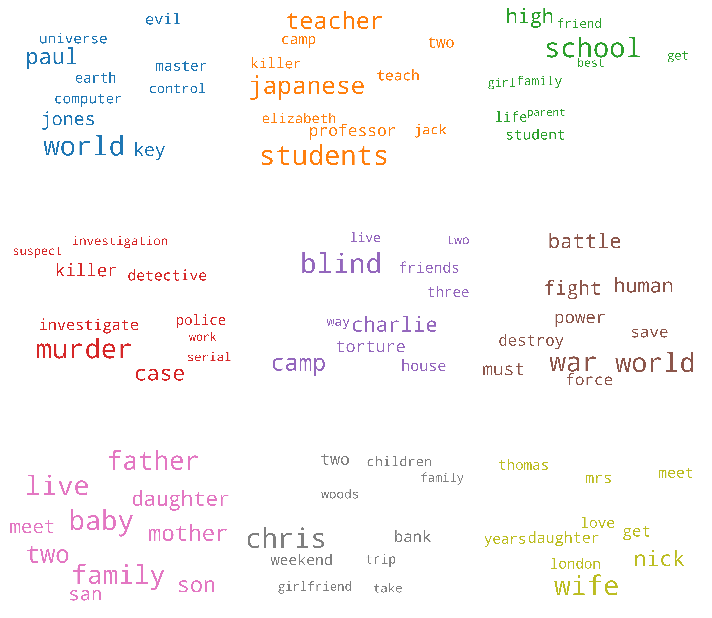

In [114]:
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = summary_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [51]:
print('topic', topic, ':', summary_lda_model.print_topic(1, topn = 40),'\n')

topic 0.005*"impossible" + 0.004*"series" + 0.003*"mission" + 0.003*"long" + 0.003*"run" + 0.001*"curse" + 0.001*"america" + 0.001*"unlikely" + 0.001*"break" + 0.001*"young" : 0.032*"agent" + 0.013*"cia" + 0.011*"get" + 0.011*"president" + 0.009*"go" + 0.009*"take" + 0.009*"agents" + 0.009*"daughter" + 0.008*"secret" + 0.008*"man" + 0.008*"hunt" + 0.007*"plan" + 0.007*"team" + 0.007*"mission" + 0.007*"spy" + 0.007*"help" + 0.007*"try" + 0.006*"know" + 0.006*"former" + 0.006*"name" + 0.006*"new" + 0.006*"kill" + 0.006*"agency" + 0.006*"tell" + 0.005*"want" + 0.005*"learn" + 0.005*"government" + 0.005*"service" + 0.005*"gold" + 0.005*"time" + 0.005*"money" + 0.005*"drug" + 0.005*"must" + 0.004*"back" + 0.004*"steal" + 0.004*"two" + 0.004*"work" + 0.004*"call" + 0.004*"men" + 0.004*"save" 



In [254]:
#tfidf version
lda_data2 = []
for i in range(len(moviedf)):
    top_topics = summary_tfidf_lda_model.get_document_topics(summary_corpus_tfidf[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(100)]
    lda_data2.append(topic_vec)
ldadf2 = pd.DataFrame(lda_data2)

In [263]:
knn = NearestNeighbors(n_neighbors = 51).fit(ldadf)
distances, indices = knn.kneighbors(ldadf)

In [317]:
movie_id = moviedf['movie'].tolist().index('Avengers: Infinity War')
for i in range(indices.shape[1]):
    print(i, moviedf['movie'][indices[movie_id, i]], distances[movie_id, i])

0 Avengers: Infinity War 0.0
1 Dune 0.2460845298833466
2 The Hobbit: The Desolation of Smaug 0.25462364571403456
3 Megamind 0.2761104353124952
4 Mortal Engines 0.2821405160236386
5 Power Rangers 0.3053476812965707
6 Gundala 0.3057579357062178
7 Waterworld 0.3079826623495895
8 The Adventures of Sharkboy and Lavagirl 3-D 0.3244360064163929
9 Avengers: Age of Ultron 0.32460339146343875
10 Sucker Punch 0.33283067743094785
11 Kung Fu Panda 3 0.35000204083626324
12 The Girl with All the Gifts 0.36087021292565785
13 Treasure Planet 0.3835569378901792
14 Percy Jackson: Sea of Monsters 0.38858874480795286
15 Kaze no tani no Naushika 0.39203379653666687
16 Thor: Ragnarok 0.39225331581103406
17 Battle Beyond the Stars 0.392672467407665
18 Justice League 0.3966423147562045
19 Tenkû no shiro Rapyuta 0.39735409796465304
20 Wo hu cang long 0.397379152545634
21 Rise of the Guardians 0.401804937770414
22 Harry Potter and the Deathly Hallows: Part 1 0.4082988353569524
23 Guardians of the Galaxy 0.412460

In [314]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger



import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [315]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    callbacks=ErrorLogger(),
    n_jobs=8,
    random_state=42,
)

C:\Users\asus\Anaconda3\lib\site-packages\openTSNE\callbacks.py:55: FutureWarning: `ErrorLogger` will be removed in upcoming version. Please use the `verbose` flag instead.
  category=FutureWarning,


In [316]:
embedding_train = tsne.fit(ldadf)

IndexError: Vector has wrong length (expected 100, got 3100)

In [318]:
ldadf

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,...,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159
1,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,...,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238
2,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,...,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.597005,0.000556
3,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,...,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357
4,0.000192,0.000192,0.000192,0.000192,0.000192,0.000192,0.000192,0.000192,0.000192,0.000192,...,0.354863,0.000192,0.000192,0.000192,0.000192,0.207533,0.000192,0.000192,0.000192,0.000192
5,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,...,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062
6,0.000185,0.000185,0.000185,0.000185,0.000185,0.000185,0.000185,0.000185,0.000185,0.000185,...,0.000185,0.000185,0.000185,0.000185,0.252081,0.000185,0.000185,0.000185,0.000185,0.000185
7,0.000057,0.000057,0.000057,0.073583,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,...,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.075982,0.000057,0.000057,0.000057
8,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,...,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625
9,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,...,0.000152,0.000152,0.000152,0.000152,0.000152,0.578169,0.000152,0.000152,0.000152,0.000152
